<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/classification_algorithm_thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
data=pd.read_csv('/content/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [309]:
data.duplicated().sum()

np.int64(240)

In [310]:
data=data.drop_duplicates()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [311]:
data.shape

(1359, 12)

In [312]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [313]:
num_cols=data.select_dtypes(np.number)
num_cols

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


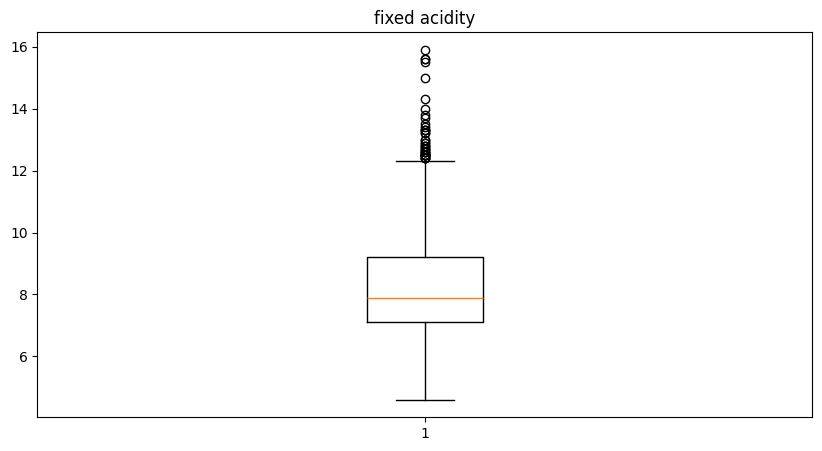

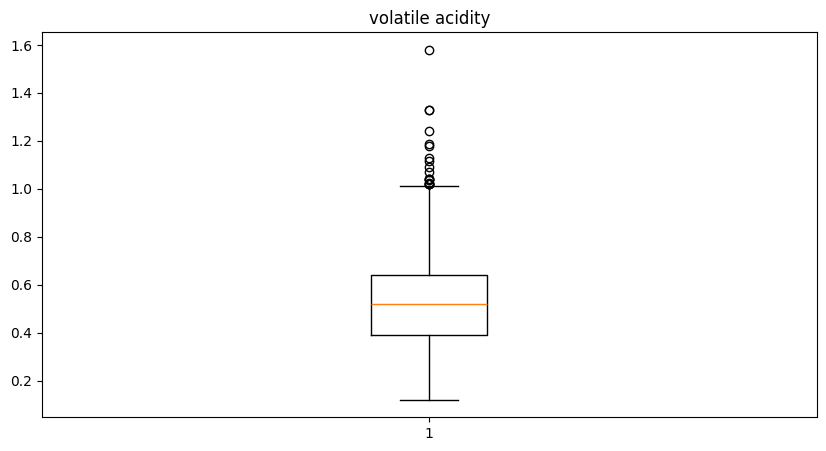

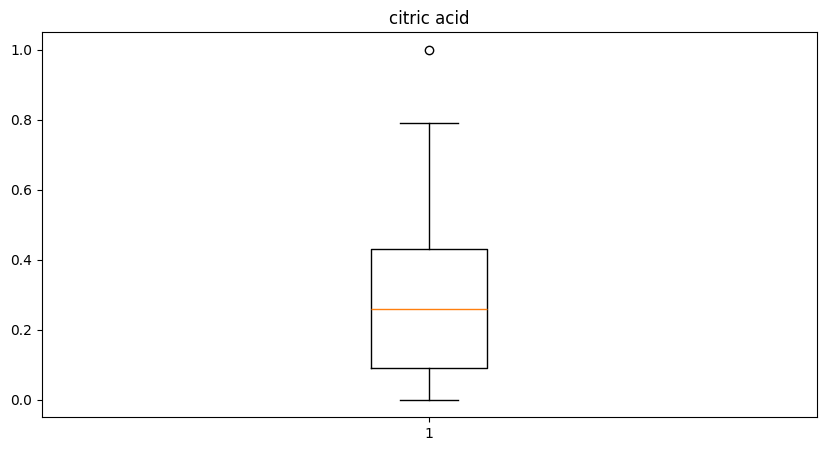

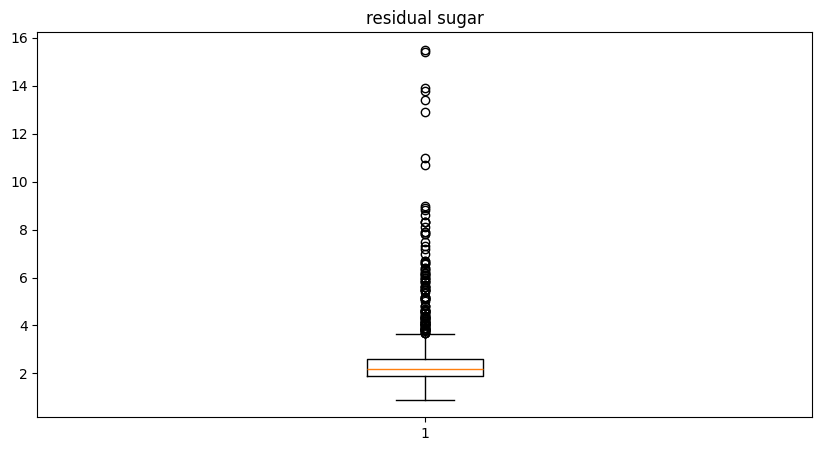

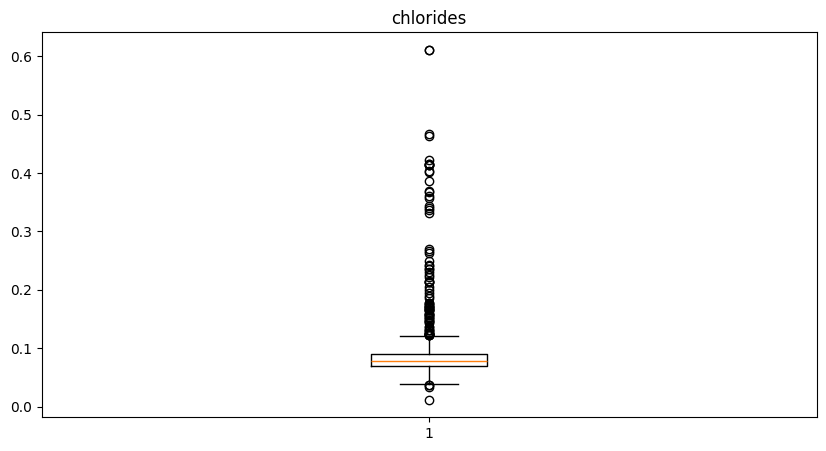

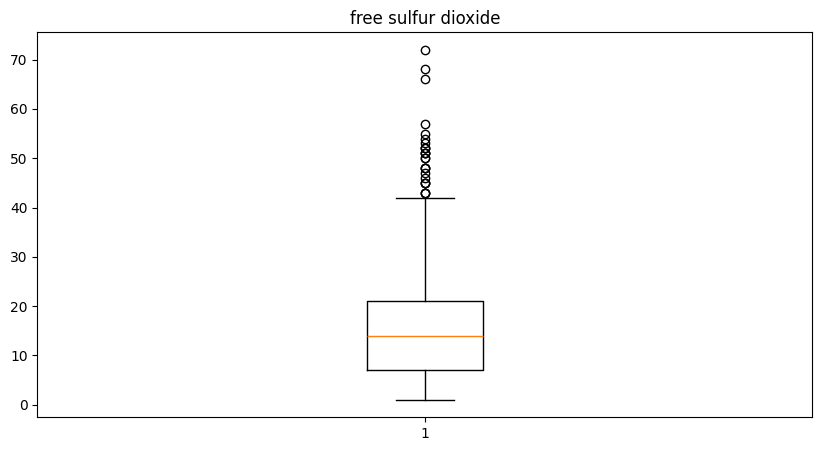

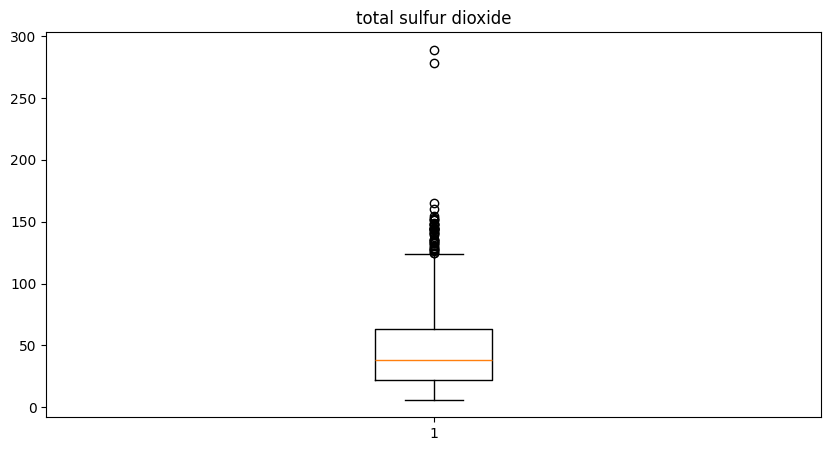

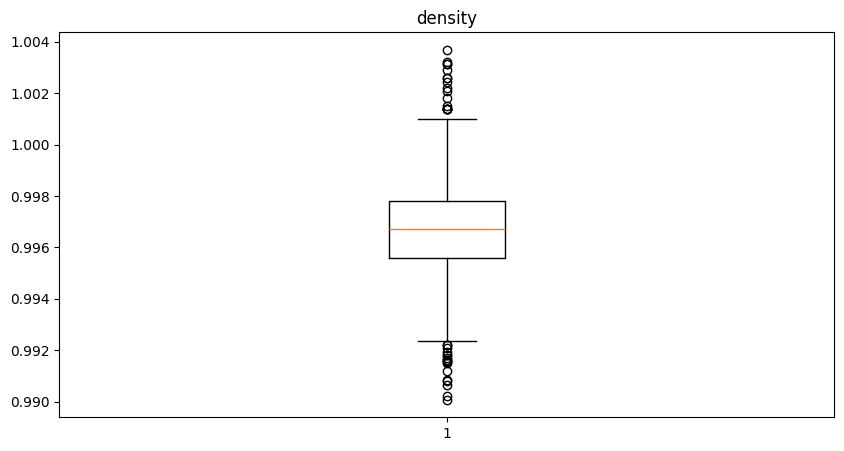

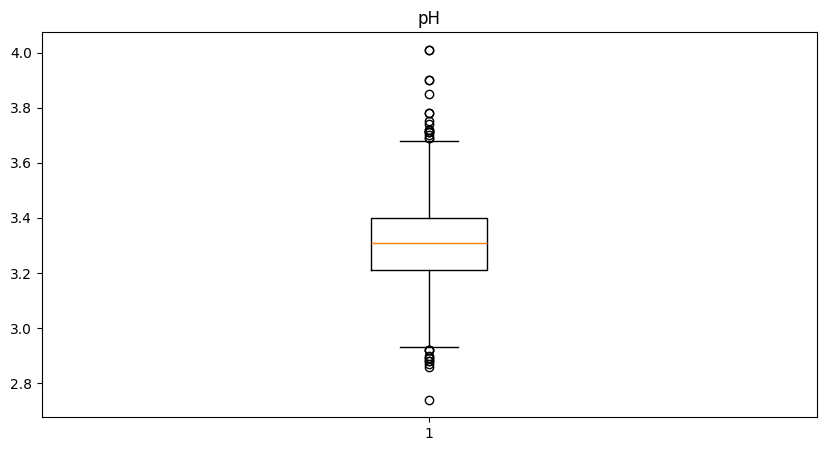

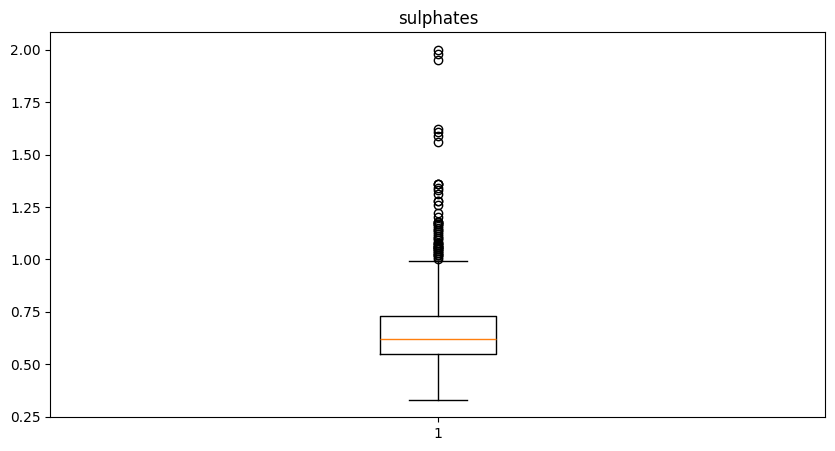

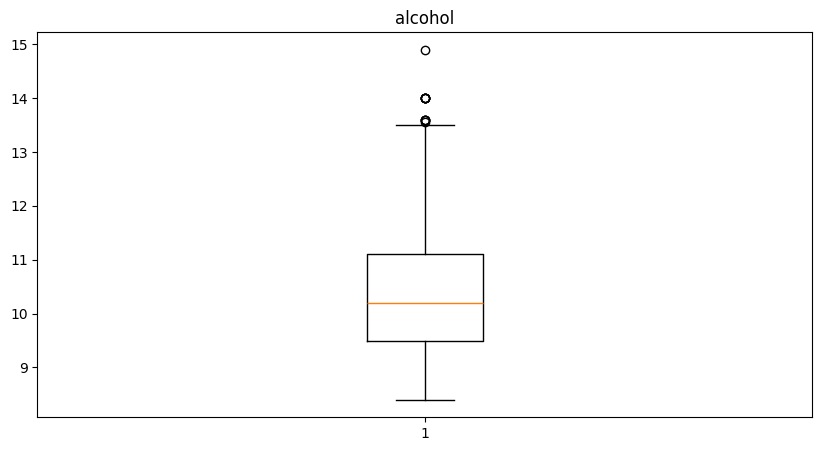

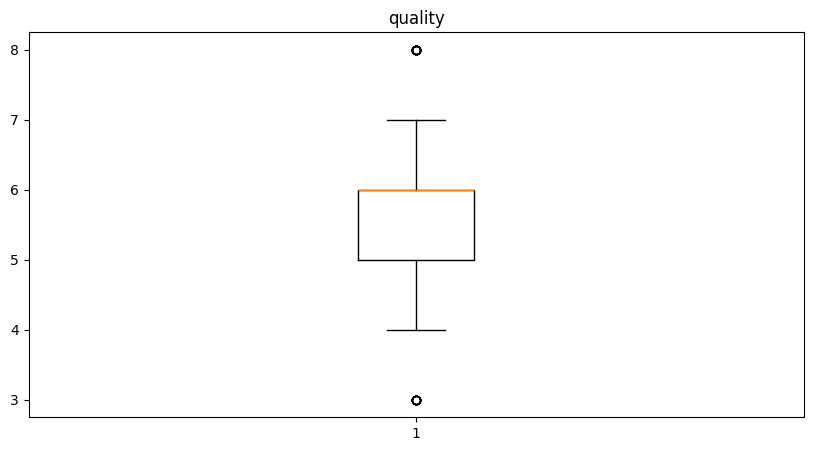

In [314]:
for i in data:
  plt.figure(figsize=(10,5))
  plt.boxplot(data[i])
  plt.title(i)

In [315]:
from scipy.stats.mstats import winsorize

In [316]:
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide','density','pH',
      'sulphates','alcohol']]=winsorize(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide','density','pH',
      'sulphates','alcohol']].values,limits=[0.01,0.01])

/tmp/ipython-input-3834488203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',


In [317]:
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide','density','pH',
      'sulphates','alcohol']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.02,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.02,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.02,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

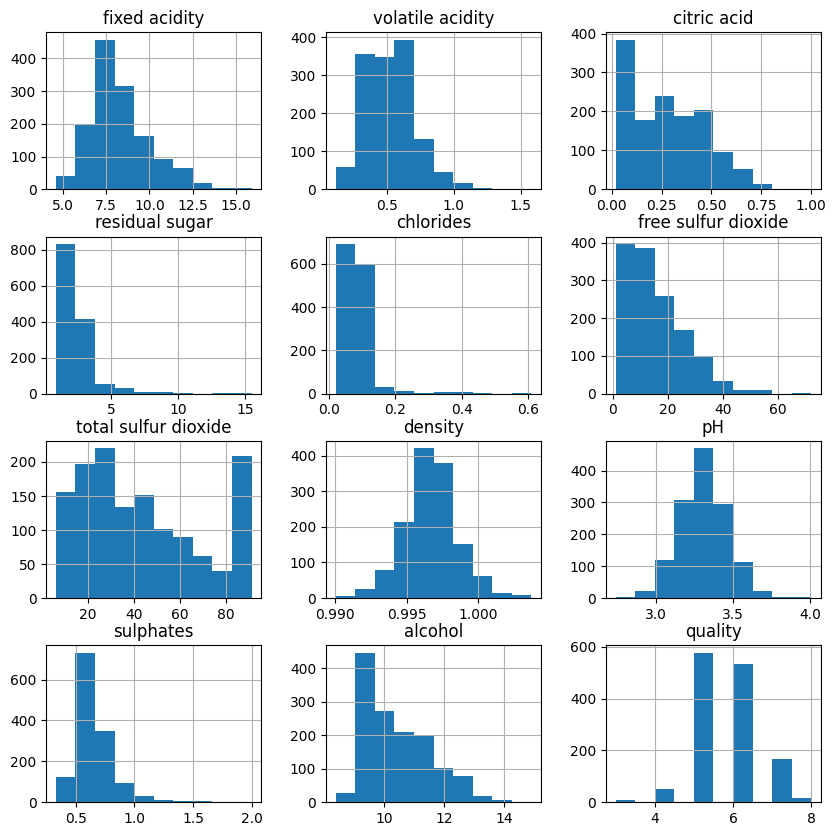

In [318]:
data.hist(figsize=(10,10))

In [319]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [320]:
min_scaler=MinMaxScaler()
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol','density','pH']]=min_scaler.fit_transform(data[['fixed acidity','volatile acidity',
      'citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol','density','pH']])

/tmp/ipython-input-3653212503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',


In [321]:
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol','density','pH']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density,pH
0,0.247788,0.397260,0.000000,0.068493,0.094755,0.140845,0.329412,0.137725,0.153846,0.567548,0.606299
1,0.283186,0.520548,0.000000,0.116438,0.131980,0.338028,0.717647,0.209581,0.215385,0.494126,0.362205
2,0.283186,0.438356,0.020408,0.095890,0.121827,0.197183,0.564706,0.191617,0.215385,0.508811,0.409449
3,0.584071,0.109589,0.551020,0.068493,0.093063,0.225352,0.635294,0.149701,0.215385,0.582232,0.330709
5,0.247788,0.369863,0.000000,0.061644,0.093063,0.169014,0.400000,0.137725,0.153846,0.567548,0.606299
...,...,...,...,...,...,...,...,...,...,...,...
1593,0.194690,0.342466,0.061224,0.068493,0.081218,0.380282,0.376471,0.293413,0.169231,0.472834,0.535433
1594,0.141593,0.328767,0.061224,0.075342,0.118443,0.436620,0.447059,0.149701,0.323077,0.354626,0.559055
1595,0.115044,0.294521,0.081633,0.089041,0.071066,0.535211,0.529412,0.257485,0.430769,0.370778,0.614173
1597,0.115044,0.359589,0.102041,0.075342,0.093063,0.436620,0.447059,0.227545,0.276923,0.396476,0.653543


In [322]:
std_scaler=StandardScaler()
data[['density','pH']]=std_scaler.fit_transform(data[['density','pH']])

/tmp/ipython-input-2682358016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['density','pH']]=std_scaler.fit_transform(data[['density','pH']])


In [323]:
data[['density','pH']]

,density,pH
0,0.584003,1.291872
1,0.048737,-0.708395
2,0.155790,-0.321247
3,0.691057,-0.966495
5,0.584003,1.291872
...,...,...
1593,-0.106490,0.711149
1594,-0.968269,0.904724
1595,-0.850510,1.356397
1597,-0.663167,1.679021


In [324]:
from sklearn.model_selection import train_test_split

In [325]:
y = data['quality']
x = data.drop(columns=['quality'])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [326]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.380531,0.178082,0.387755,0.089041,0.081218,0.154930,0.258824,-0.989679,-0.256722,0.251497,0.646154
1519,0.176991,0.397260,0.061224,0.116438,0.145516,0.183099,0.247059,-0.031553,0.840199,0.149701,0.276923
452,0.194690,0.301370,0.010204,0.054795,0.108291,0.239437,0.341176,0.048737,0.840199,0.179641,0.246154
847,0.247788,0.383562,0.142857,0.061644,0.098139,0.154930,0.388235,0.530477,1.227347,0.221557,0.230769
58,0.283186,0.321918,0.163265,0.095890,0.094755,0.225352,0.564706,0.423424,0.775674,0.155689,0.246154
...,...,...,...,...,...,...,...,...,...,...,...
1285,0.592920,0.171233,0.489796,0.061644,0.118443,0.267606,0.482353,0.337781,-1.031019,0.143713,0.323077
1329,0.247788,0.328767,0.244898,0.082192,0.106599,0.225352,1.000000,-0.293833,-0.127673,0.137725,0.215385
1526,0.194690,0.239726,0.061224,0.089041,0.074450,0.239437,0.376471,-0.631051,-0.063148,0.191617,0.184615
1011,0.380531,0.136986,0.295918,0.075342,0.115059,0.154930,0.152941,-0.540056,-0.901970,0.131737,0.307692


In [327]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
55,0.274336,0.342466,0.020408,0.198630,0.108291,0.338028,0.458824,0.584003,0.194951,0.119760,0.169231
1291,0.318584,0.352740,0.081633,0.082192,0.089679,0.338028,0.635294,-0.176075,-0.127673,0.251497,0.384615
1544,0.336283,0.171233,0.418367,0.095890,0.072758,0.154930,0.152941,-0.647109,-0.901970,0.287425,0.430769
593,0.469027,0.253425,0.571429,0.178082,0.125212,0.112676,0.435294,1.975695,-0.127673,0.149701,0.092308
1261,0.150442,0.616438,0.000000,0.075342,0.106599,0.225352,0.211765,-1.251960,1.808070,0.131737,0.430769
...,...,...,...,...,...,...,...,...,...,...,...
1086,0.345133,0.150685,0.387755,0.260274,0.059222,0.028169,0.035294,0.359192,0.453050,0.197605,0.492308
662,0.230088,0.308219,0.040816,0.047945,0.094755,0.112676,0.247059,0.262844,0.324001,0.221557,0.184615
279,0.380531,0.191781,0.306122,0.321918,0.113367,0.126761,0.482353,1.279849,0.453050,0.263473,0.323077
1111,0.070796,0.205479,0.255102,0.075342,0.121827,0.309859,0.576471,-1.069969,3.034041,0.185629,0.600000


In [328]:
y_train

,quality
1016,7
1519,5
452,6
847,6
58,5
...,...
1285,5
1329,6
1526,6
1011,6


In [329]:
y_test

,quality
55,5
1291,6
1544,7
593,5
1261,4
...,...
1086,7
662,6
279,7
1111,7


In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [332]:
y_pred

array([5, 6, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 7, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 7, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6,
       5, 5, 7, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 6, 5])

In [333]:
y_test

,quality
55,5
1291,6
1544,7
593,5
1261,4
...,...
1086,7
662,6
279,7
1111,7


In [334]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred, average='weighted'))
print('recall is',recall_score(y_test,y_pred, average='weighted'))
print('f1 score is',f1_score(y_test,y_pred, average='weighted'))

accuracy_score is 0.6066176470588235
precision is 0.5617723986779534
recall is 0.6066176470588235
f1 score is 0.5706360780415844


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [335]:
Q1 = np.quantile(data['fixed acidity'],0.25)
Q3 = np.quantile(data['fixed acidity'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.22123893805309736
Q3 0.4070796460176991
IQR 0.18584070796460173
upper bound 0.6858407079646016
lower bound -0.05752212389380523


In [336]:
fixed_acidity_outliers = []
for i in data['fixed acidity']:
  if i>upperbound or i<lowerbound:
    fixed_acidity_outliers.append(i)
fixed_acidity_outliers


[0.7256637168141593,
 0.920353982300885,
 0.6991150442477876,
 0.7699115044247788,
 0.7787610619469028,
 0.6902654867256637,
 0.6991150442477876,
 0.8141592920353984,
 0.7876106194690267,
 0.7079646017699115,
 0.6991150442477876,
 0.7256637168141593,
 0.831858407079646,
 0.8053097345132743,
 0.7168141592920354,
 0.6991150442477876,
 0.7256637168141593,
 0.7079646017699115,
 0.9734513274336283,
 0.6991150442477876,
 0.7433628318584071,
 0.6991150442477876,
 0.7699115044247788,
 0.6902654867256637,
 0.6991150442477876,
 0.7345132743362832,
 0.8584070796460177,
 0.6902654867256637,
 0.9646017699115044,
 0.9734513274336283,
 0.7433628318584071,
 0.7168141592920354,
 0.6902654867256637,
 0.7168141592920354,
 0.7610619469026547,
 0.7610619469026547,
 1.0,
 0.7699115044247788,
 0.7345132743362832,
 0.7079646017699115,
 0.7079646017699115]

In [337]:
data['fixed acidity'] = data['fixed acidity'].clip(lower=lowerbound,upper=upperbound)
data['fixed acidity']

/tmp/ipython-input-1185237947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fixed acidity'] = data['fixed acidity'].clip(lower=lowerbound,upper=upperbound)


,fixed acidity
0,0.247788
1,0.283186
2,0.283186
3,0.584071
5,0.247788
...,...
1593,0.194690
1594,0.141593
1595,0.115044
1597,0.115044


In [338]:
Q1 = np.quantile(data['volatile acidity'],0.25)
Q3 = np.quantile(data['volatile acidity'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.18493150684931509
Q3 0.3561643835616438
IQR 0.17123287671232873
upper bound 0.6130136986301369
lower bound -0.07191780821917798


In [339]:
volatile_acidity_outliers = []
for i in data['volatile acidity']:
  if i>upperbound or i<lowerbound:
    volatile_acidity_outliers.append(i)
volatile_acidity_outliers


[0.6917808219178081,
 0.6164383561643836,
 0.6506849315068494,
 0.8287671232876712,
 0.8287671232876712,
 0.6301369863013698,
 0.6643835616438356,
 0.6301369863013698,
 0.7671232876712328,
 0.7294520547945206,
 0.6164383561643836,
 0.6267123287671232,
 0.6198630136986301,
 0.6815068493150684,
 0.6164383561643836,
 0.6164383561643836,
 0.9999999999999999,
 0.7260273972602739,
 0.6301369863013698]

In [340]:
data['volatile acidity'] = data['volatile acidity'].clip(lower=lowerbound,upper=upperbound)
data['volatile acidity']

/tmp/ipython-input-2083153086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['volatile acidity'] = data['volatile acidity'].clip(lower=lowerbound,upper=upperbound)


,volatile acidity
0,0.397260
1,0.520548
2,0.438356
3,0.109589
5,0.369863
...,...
1593,0.342466
1594,0.328767
1595,0.294521
1597,0.359589


In [341]:
Q1 = np.quantile(data['citric acid'],0.25)
Q3 = np.quantile(data['citric acid'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.07142857142857142
Q3 0.4183673469387755
IQR 0.346938775510204
upper bound 0.9387755102040816
lower bound -0.44897959183673464


In [342]:
citricacid_outliers = []
for i in data['citric acid']:
  if i>upperbound or i<lowerbound:
    citricacid_outliers.append(i)
citricacid_outliers


[1.0]

In [343]:
data['citric acid'] = data['citric acid'].clip(lower=lowerbound,upper=upperbound)
data['citric acid']

/tmp/ipython-input-2409309360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['citric acid'] = data['citric acid'].clip(lower=lowerbound,upper=upperbound)


,citric acid
0,0.000000
1,0.000000
2,0.020408
3,0.551020
5,0.000000
...,...
1593,0.061224
1594,0.061224
1595,0.081633
1597,0.102041


In [344]:
Q1 = np.quantile(data['residual sugar'],0.25)
Q3 = np.quantile(data['residual sugar'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.0684931506849315
Q3 0.11643835616438356
IQR 0.04794520547945205
upper bound 0.18835616438356162
lower bound -0.003424657534246575


In [345]:
resi_sug_outliers = []
for i in data['residual sugar']:
  if i>upperbound or i<lowerbound:
    resi_sug_outliers.append(i)
resi_sug_outliers


[0.3561643835616438,
 0.19863013698630136,
 0.20547945205479448,
 0.23972602739726026,
 0.6712328767123287,
 0.31506849315068486,
 0.34246575342465757,
 0.19863013698630136,
 0.28767123287671226,
 0.2568493150684932,
 0.31506849315068486,
 0.31506849315068486,
 0.4383561643835616,
 0.43150684931506844,
 0.19863013698630136,
 0.32191780821917804,
 0.21232876712328766,
 0.21232876712328766,
 0.21232876712328766,
 0.4178082191780822,
 0.37671232876712324,
 0.32191780821917804,
 0.6917808219178081,
 0.24657534246575344,
 0.26712328767123283,
 0.3356164383561644,
 0.19863013698630136,
 0.23972602739726026,
 0.363013698630137,
 0.22602739726027396,
 0.47945205479452047,
 0.19178082191780824,
 0.24657534246575344,
 0.3972602739726028,
 0.3904109589041096,
 0.19178082191780824,
 0.29452054794520544,
 1.0,
 0.21917808219178078,
 0.5068493150684932,
 0.386986301369863,
 0.2534246575342466,
 0.3561643835616438,
 0.23287671232876708,
 0.3356164383561644,
 0.29109589041095896,
 0.36986301369863006,

In [346]:
data['residual sugar'] = data['residual sugar'].clip(lower=lowerbound,upper=upperbound)
data['residual sugar']

/tmp/ipython-input-2428303224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['residual sugar'] = data['residual sugar'].clip(lower=lowerbound,upper=upperbound)


,residual sugar
0,0.068493
1,0.116438
2,0.095890
3,0.068493
5,0.061644
...,...
1593,0.068493
1594,0.075342
1595,0.089041
1597,0.075342


In [347]:
Q1 = np.quantile(data['chlorides'],0.25)
Q3 = np.quantile(data['chlorides'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.08460236886632827
Q3 0.12013536379018613
IQR 0.035532994923857864
upper bound 0.17343485617597293
lower bound 0.031302876480541475


In [348]:
chlo_outliers = []
for i in data['chlorides']:
  if i>upperbound or i<lowerbound:
    chlo_outliers.append(i)
chlo_outliers


[0.2639593908629442,
 0.25380710659898476,
 0.5888324873096447,
 0.5431472081218275,
 0.25719120135363793,
 0.5279187817258884,
 0.7512690355329947,
 0.6446700507614214,
 0.7563451776649747,
 0.26734348561759724,
 0.2131979695431472,
 0.36548223350253806,
 0.9983079526226735,
 0.5752961082910321,
 0.4230118443316413,
 0.5363790186125211,
 0.41116751269035534,
 1.0,
 0.571912013536379,
 0.5465313028764804,
 0.28087986463620984,
 0.3265651438240271,
 0.32825719120135366,
 0.18274111675126906,
 0.23519458544839258,
 0.17597292724196278,
 0.260575296108291,
 0.18104906937394247,
 0.6649746192893401,
 0.22335025380710657,
 0.22335025380710657,
 0.17766497461928935,
 0.30456852791878175,
 0.2554991539763114,
 0.3485617597292724,
 0.38917089678510997,
 0.21658206429780033,
 0.17597292724196278,
 0.2081218274111675,
 0.34179357021996615,
 0.2318104906937394,
 0.6802030456852791,
 0.023688663282571916,
 0.6209813874788495,
 0.6683587140439932,
 0.2318104906937394,
 0.2318104906937394,
 0.377326

In [349]:
data['chlorides'] = data['chlorides'].clip(lower=lowerbound,upper=upperbound)
data['chlorides']

/tmp/ipython-input-2210277484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chlorides'] = data['chlorides'].clip(lower=lowerbound,upper=upperbound)


,chlorides
0,0.094755
1,0.131980
2,0.121827
3,0.093063
5,0.093063
...,...
1593,0.081218
1594,0.118443
1595,0.071066
1597,0.093063


In [350]:
Q1 = np.quantile(data['free sulfur dioxide'],0.25)
Q3 = np.quantile(data['free sulfur dioxide'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.08450704225352114
Q3 0.28169014084507044
IQR 0.1971830985915493
upper bound 0.5774647887323945
lower bound -0.21126760563380287


In [351]:
fr_so2_outliers = []
for i in data['free sulfur dioxide']:
  if i>upperbound or i<lowerbound:
    fr_so2_outliers.append(i)
fr_so2_outliers


[0.7183098591549296,
 0.7042253521126761,
 0.6901408450704226,
 0.943661971830986,
 0.5915492957746479,
 0.647887323943662,
 0.7464788732394366,
 0.6338028169014085,
 0.619718309859155,
 0.7323943661971831,
 0.7183098591549296,
 0.7042253521126761,
 0.619718309859155,
 0.7887323943661972,
 0.6901408450704226,
 0.619718309859155,
 0.6619718309859155,
 0.5915492957746479,
 0.6619718309859155,
 1.0,
 0.5915492957746479,
 0.7042253521126761,
 0.7183098591549296,
 0.7605633802816901,
 0.6619718309859155,
 0.9154929577464789]

In [352]:
data['free sulfur dioxide'] = data['free sulfur dioxide'].clip(lower=lowerbound,upper=upperbound)
data['free sulfur dioxide']

/tmp/ipython-input-2680187681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['free sulfur dioxide'] = data['free sulfur dioxide'].clip(lower=lowerbound,upper=upperbound)


,free sulfur dioxide
0,0.140845
1,0.338028
2,0.197183
3,0.225352
5,0.169014
...,...
1593,0.380282
1594,0.436620
1595,0.535211
1597,0.436620


In [353]:
Q1 = np.quantile(data['total sulfur dioxide'],0.25)
Q3 = np.quantile(data['total sulfur dioxide'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.18823529411764703
Q3 0.6705882352941177
IQR 0.48235294117647065
upper bound 1.3941176470588237
lower bound -0.5352941176470589


In [354]:
tot_so2_outliers = []
for i in data['total sulfur dioxide']:
  if i>upperbound or i<lowerbound:
    tot_so2_outliers.append(i)
tot_so2_outliers


[]

In [355]:
data['total sulfur dioxide'] = data['total sulfur dioxide'].clip(lower=lowerbound,upper=upperbound)
data['total sulfur dioxide']

/tmp/ipython-input-793217394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total sulfur dioxide'] = data['total sulfur dioxide'].clip(lower=lowerbound,upper=upperbound)


,total sulfur dioxide
0,0.329412
1,0.717647
2,0.564706
3,0.635294
5,0.400000
...,...
1593,0.376471
1594,0.447059
1595,0.529412
1597,0.447059


In [356]:
Q1 = np.quantile(data['density'],0.25)
Q3 = np.quantile(data['density'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 -0.5935822209890081
Q3 0.5947086825447282
IQR 1.1882909035337363
upper bound 2.3771450378453327
lower bound -2.3760185762896127


In [357]:
density_outliers = []
for i in data['density']:
  if i>upperbound or i<lowerbound:
    density_outliers.append(i)
density_outliers


[-2.734646912040958,
 2.510961581036138,
 2.5644881983125014,
 2.7250680501413846,
 -2.9487533811462048,
 2.939174519246528,
 2.510961581036138,
 2.510961581036138,
 2.510961581036138,
 3.474440692009541,
 3.153280988351671,
 2.510961581036138,
 3.4476773833713077,
 3.4476773833713077,
 2.8856479019701644,
 -2.6811202947645945,
 -2.4134872083831915,
 3.153280988351671,
 -2.467013825659451,
 -2.7667628824067347,
 -3.2485024378933844,
 3.3085081784530113,
 -2.723941588585768,
 -3.5536041563683147,
 -3.4840195539091146,
 -2.4134872083831915,
 -2.788173529317218,
 -2.750704897223898,
 -3.162859850251348,
 -3.1414492033407613,
 -2.568714398484428,
 3.736721116663298,
 3.0569330772544445,
 -2.616888354033041,
 -2.616888354033041]

In [358]:
data['density'] = data['density'].clip(lower=lowerbound,upper=upperbound)
data['density']

/tmp/ipython-input-1232643789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['density'] = data['density'].clip(lower=lowerbound,upper=upperbound)


,density
0,0.584003
1,0.048737
2,0.155790
3,0.691057
5,0.584003
...,...
1593,-0.106490
1594,-0.968269
1595,-0.850510
1597,-0.663167


In [359]:
Q1 = np.quantile(data['pH'],0.25)
Q3 = np.quantile(data['pH'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 -0.6438707196559943
Q3 0.5820997730980381
IQR 1.2259704927540325
upper bound 2.4210555122290867
lower bound -2.4828264587870432


In [360]:
pH_outliers = []
for i in data['pH']:
  if i>upperbound or i<lowerbound:
    pH_outliers.append(i)
pH_outliers


[3.808337911924433,
 2.8404664702765157,
 3.4857140980417975,
 -3.676534570152806,
 2.4533178936173488,
 -2.7731878912814163,
 -2.902237416834472,
 2.775941707499988,
 -2.515088840175305,
 -2.515088840175305,
 2.6468921819469324,
 -2.837712654057944,
 -2.7086631285048886,
 -2.515088840175305,
 3.808337911924433,
 2.5823674191704042,
 2.4533178936173488,
 2.5823674191704042,
 -2.7086631285048886,
 3.0340407586060993,
 2.5178426563938765,
 3.0340407586060993,
 4.518110302466243,
 -2.644138365728361,
 4.518110302466243,
 2.5823674191704042,
 -2.7731878912814163,
 2.6468921819469324]

In [361]:
data['pH'] = data['pH'].clip(lower=lowerbound,upper=upperbound)
data['pH']

/tmp/ipython-input-1800436734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pH'] = data['pH'].clip(lower=lowerbound,upper=upperbound)


,pH
0,1.291872
1,-0.708395
2,-0.321247
3,-0.966495
5,1.291872
...,...
1593,0.711149
1594,0.904724
1595,1.356397
1597,1.679021


In [362]:
Q1 = np.quantile(data['sulphates'],0.25)
Q3 = np.quantile(data['sulphates'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.1317365269461078
Q3 0.2395209580838323
IQR 0.10778443113772451
upper bound 0.4011976047904191
lower bound -0.029940119760478973


In [363]:
sulp_outliers = []
for i in data['sulphates']:
  if i>upperbound or i<lowerbound:
    sulp_outliers.append(i)
sulp_outliers


[0.7365269461077846,
 0.5688622754491018,
 0.4491017964071857,
 0.5209580838323353,
 0.47305389221556904,
 0.5688622754491018,
 0.4850299401197605,
 0.9700598802395209,
 0.532934131736527,
 0.9880239520958084,
 0.5868263473053893,
 1.0,
 0.4491017964071857,
 0.754491017964072,
 0.4131736526946108,
 0.41916167664670667,
 0.7664670658682636,
 0.4550898203592816,
 0.5568862275449102,
 0.4491017964071857,
 0.4011976047904192,
 0.6167664670658684,
 0.5089820359281437,
 0.47904191616766467,
 0.4251497005988025,
 0.4670658682634732,
 0.44311377245508987,
 0.4371257485029941,
 0.4371257485029941,
 0.43113772455089827,
 0.4371257485029941,
 0.4251497005988025,
 0.43113772455089827,
 0.4131736526946108,
 0.4850299401197605,
 0.4131736526946108,
 0.6167664670658684,
 0.6167664670658684,
 0.43113772455089827,
 0.5029940119760479,
 0.7724550898203595,
 0.4371257485029941,
 0.5089820359281437,
 0.44311377245508987,
 0.6047904191616768,
 0.4970059880239521,
 0.4610778443113773,
 0.49101796407185627,


In [364]:
data['sulphates'] = data['sulphates'].clip(lower=lowerbound,upper=upperbound)
data['sulphates']

/tmp/ipython-input-1512809584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sulphates'] = data['sulphates'].clip(lower=lowerbound,upper=upperbound)


,sulphates
0,0.137725
1,0.209581
2,0.191617
3,0.149701
5,0.137725
...,...
1593,0.293413
1594,0.149701
1595,0.257485
1597,0.227545


In [365]:
Q1 = np.quantile(data['alcohol'],0.25)
Q3 = np.quantile(data['alcohol'],0.75)
IQR = Q3-Q1
lowerbound = Q1-(1.5*IQR)
upperbound = Q3+(1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.1692307692307693
Q3 0.41538461538461546
IQR 0.24615384615384617
upper bound 0.7846153846153847
lower bound -0.19999999999999996


In [366]:
alc_outliers = []
for i in data['alcohol']:
  if i>upperbound or i<lowerbound:
    alc_outliers.append(i)
alc_outliers


[0.8615384615384618,
 0.8615384615384618,
 0.8615384615384618,
 1.0000000000000002,
 0.8615384615384618,
 0.8,
 0.8,
 0.8,
 0.8615384615384618,
 0.8615384615384618,
 0.7948717948717998,
 0.8]

In [367]:
data['alcohol'] = data['alcohol'].clip(lower=lowerbound,upper=upperbound)
data['alcohol']

/tmp/ipython-input-2140784345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['alcohol'] = data['alcohol'].clip(lower=lowerbound,upper=upperbound)


,alcohol
0,0.153846
1,0.215385
2,0.215385
3,0.215385
5,0.153846
...,...
1593,0.169231
1594,0.323077
1595,0.430769
1597,0.276923


In [368]:
min_scaler=MinMaxScaler()
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol','density','pH']]=min_scaler.fit_transform(data[['fixed acidity','volatile acidity',
      'citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol','density','pH']])

/tmp/ipython-input-3653212503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',


In [369]:
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
      'free sulfur dioxide','total sulfur dioxide',
      'sulphates','alcohol','density','pH']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density,pH
0,0.361290,0.648045,0.000000,0.363636,0.446429,0.243902,0.329412,0.343284,0.196078,0.622748,0.769737
1,0.412903,0.849162,0.000000,0.618182,0.708333,0.585366,0.717647,0.522388,0.274510,0.510135,0.361842
2,0.412903,0.715084,0.021739,0.509091,0.636905,0.341463,0.564706,0.477612,0.274510,0.532658,0.440789
3,0.851613,0.178771,0.586957,0.363636,0.434524,0.390244,0.635294,0.373134,0.274510,0.645270,0.309211
5,0.361290,0.603352,0.000000,0.327273,0.434524,0.292683,0.400000,0.343284,0.196078,0.622748,0.769737
...,...,...,...,...,...,...,...,...,...,...,...
1593,0.283871,0.558659,0.065217,0.363636,0.351190,0.658537,0.376471,0.731343,0.215686,0.477477,0.651316
1594,0.206452,0.536313,0.065217,0.400000,0.613095,0.756098,0.447059,0.373134,0.411765,0.296171,0.690789
1595,0.167742,0.480447,0.086957,0.472727,0.279762,0.926829,0.529412,0.641791,0.549020,0.320946,0.782895
1597,0.167742,0.586592,0.108696,0.400000,0.434524,0.756098,0.447059,0.567164,0.352941,0.360360,0.848684


In [397]:
std_scaler=StandardScaler()
data[['density','pH']]=std_scaler.fit_transform(data[['density','pH']])

/tmp/ipython-input-2682358016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['density','pH']]=std_scaler.fit_transform(data[['density','pH']])


In [371]:
data[['density','pH']]

,density,pH
0,0.608506,1.341398
1,0.051991,-0.726282
2,0.163294,-0.326086
3,0.719809,-0.993080
5,0.608506,1.341398
...,...,...
1593,-0.109399,0.741104
1594,-1.005388,0.941202
1595,-0.882955,1.408098
1597,-0.688174,1.741595


In [372]:
from sklearn.model_selection import train_test_split

In [373]:
y = data['quality']
x = data.drop(columns=['quality'])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [374]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.554839,0.290503,0.413043,0.472727,0.351190,0.268293,0.258824,-1.027649,-0.259386,0.626866,0.823529
1519,0.258065,0.648045,0.065217,0.618182,0.803571,0.317073,0.247059,-0.031487,0.874503,0.373134,0.352941
452,0.283871,0.491620,0.010870,0.290909,0.541667,0.414634,0.341176,0.051991,0.874503,0.447761,0.313725
847,0.361290,0.625698,0.152174,0.327273,0.470238,0.268293,0.388235,0.552854,1.274699,0.552239,0.294118
58,0.412903,0.525140,0.173913,0.509091,0.446429,0.390244,0.564706,0.441551,0.807803,0.388060,0.313725
...,...,...,...,...,...,...,...,...,...,...,...
1285,0.864516,0.279330,0.521739,0.327273,0.613095,0.463415,0.482353,0.352509,-1.059779,0.358209,0.411765
1329,0.361290,0.536313,0.260870,0.436364,0.529762,0.390244,1.000000,-0.304179,-0.125988,0.343284,0.274510
1526,0.283871,0.391061,0.065217,0.472727,0.303571,0.414634,0.376471,-0.654783,-0.059288,0.477612,0.235294
1011,0.554839,0.223464,0.315217,0.400000,0.589286,0.268293,0.152941,-0.560176,-0.926380,0.328358,0.392157


In [375]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
55,0.400000,0.558659,0.021739,1.000000,0.541667,0.585366,0.458824,0.608506,0.207509,0.298507,0.215686
1291,0.464516,0.575419,0.086957,0.436364,0.410714,0.585366,0.635294,-0.181746,-0.125988,0.626866,0.490196
1544,0.490323,0.279330,0.445652,0.509091,0.291667,0.268293,0.152941,-0.671479,-0.926380,0.716418,0.549020
593,0.683871,0.413408,0.608696,0.945455,0.660714,0.195122,0.435294,2.055444,-0.125988,0.373134,0.117647
1261,0.219355,1.000000,0.000000,0.400000,0.529762,0.390244,0.211765,-1.300341,1.874993,0.328358,0.549020
...,...,...,...,...,...,...,...,...,...,...,...
1086,0.503226,0.245810,0.413043,1.000000,0.196429,0.048780,0.035294,0.374769,0.474307,0.492537,0.627451
662,0.335484,0.502793,0.043478,0.254545,0.446429,0.195122,0.247059,0.274597,0.340908,0.552239,0.235294
279,0.554839,0.312849,0.326087,1.000000,0.577381,0.219512,0.482353,1.331975,0.474307,0.656716,0.411765
1111,0.103226,0.335196,0.271739,0.400000,0.636905,0.536585,0.576471,-1.111126,2.508637,0.462687,0.764706


In [376]:
y_train

,quality
1016,7
1519,5
452,6
847,6
58,5
...,...
1285,5
1329,6
1526,6
1011,6


In [377]:
y_test

,quality
55,5
1291,6
1544,7
593,5
1261,4
...,...
1086,7
662,6
279,7
1111,7


In [378]:
from sklearn.linear_model import LogisticRegression

In [379]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [380]:
y_pred

array([5, 6, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5,
       5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5,
       7, 6, 5, 7, 5, 7, 5, 7, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 7, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6,
       5, 5, 7, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 7, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 5])

In [381]:
y_test

,quality
55,5
1291,6
1544,7
593,5
1261,4
...,...
1086,7
662,6
279,7
1111,7


In [382]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred, average='weighted'))
print('recall is',recall_score(y_test,y_pred, average='weighted'))
print('f1 score is',f1_score(y_test,y_pred, average='weighted'))

accuracy_score is 0.6029411764705882
precision is 0.5621865290999446
recall is 0.6029411764705882
f1 score is 0.5792961379825909


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [383]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  7,  4,  0,  0],
       [ 0,  0, 88, 32,  0,  0],
       [ 0,  0, 30, 64,  9,  0],
       [ 0,  0,  2, 17, 12,  0],
       [ 0,  0,  0,  2,  1,  0]])

In [384]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,18)

In [385]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

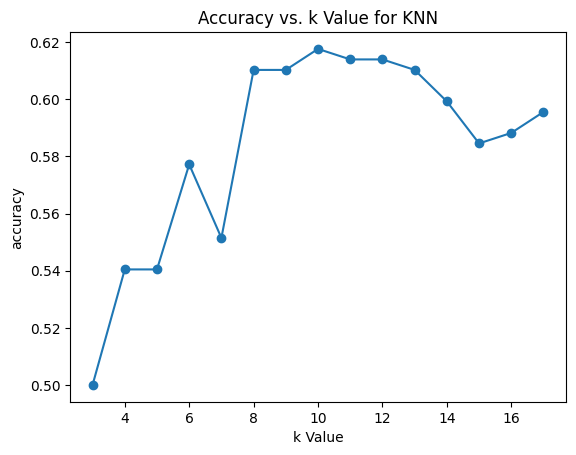

In [386]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.title('Accuracy vs. k Value for KNN')
plt.show()

In [395]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [396]:
print('accuracy_score is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred, average='weighted'))
print('recall is',recall_score(y_test,y_pred, average='weighted'))
print('f1 score is',f1_score(y_test,y_pred, average='weighted'))
confusion_matrix(y_test,y_pred)

accuracy_score is 0.6176470588235294
precision is 0.6054534571289634
recall is 0.6176470588235294
f1 score is 0.5991142097864788


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[ 0,  1,  3,  0,  0,  0],
       [ 0,  1,  6,  4,  0,  0],
       [ 0,  0, 86, 34,  0,  0],
       [ 0,  0, 31, 68,  4,  0],
       [ 0,  0,  4, 14, 13,  0],
       [ 0,  0,  0,  2,  1,  0]])